Human-Centrerd Data Science ([HCDS](https://www.mi.fu-berlin.de/en/inf/groups/hcc/teaching/winter_term_2020_21/course_human_centered_data_science.html)) - Winter Term 2020/21 - [HCC](https://www.mi.fu-berlin.de/en/inf/groups/hcc/index.html) | [Freie Universität Berlin](https://www.fu-berlin.de/)
***
# A2 - Reproducibility Workflow


Your assignment is to create a graph that looks a lot like this one, starting from scratch, and following best practices for reproducible research:

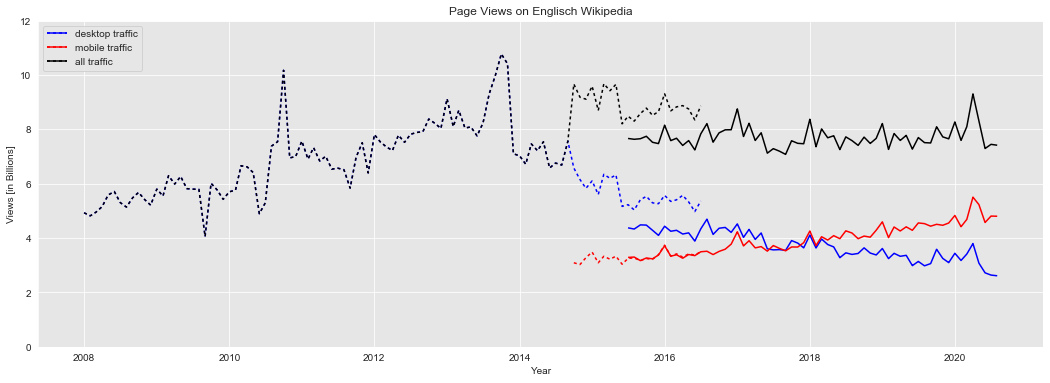

## Before you start
1. Read all instructions carefully before you begin.
1. Read all API documentation carefully before you begin.
1. Experiment with queries in the sandbox of the technical documentation for each API to familiarize yourself with the schema and the data.
1. Ask questions if you're unsure about anything!
1. When documenting/describing your project, think: "If I found this GitHub repo, and wanted to fully reproduce the analysis, what information would I want? What information would I need?"

## Step 1: Data acquisition
In order to measure Wikipedia traffic from January 2008 until October 2020, you will need to collect data from two different APIs:

1. The **Legacy Pagecounts API** ([documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Legacy_Pagecounts), [endpoint](https://wikimedia.org/api/rest_v1/#!/Pagecounts_data_(legacy)/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end)) provides access to desktop and mobile traffic data from December 2007 through July 2016.
1. The **Pageviews API** ([documentation](https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews), [endpoint](https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end)) provides access to desktop, mobile web, and mobile app traffic data from July 2015 through last month.

For each API, you will need to collect data for all months where data is available and then save the raw results into five separate `JSON`files (one file per API query type) before continuing to step 2.

To get you started, you can use the following **sample code for API calls**:

In [ ]:
# Source: https://public.paws.wmcloud.org/User:Jtmorgan/data512_a1_example.ipynb?format=raw

import json
import requests

endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

# SAMPLE parameters for getting aggregated legacy view data 
# see: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end
example_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2001010100",
                # for end use 1st day of month following final month of data
                 "end" : "2018100100"
                    }

# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
example_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2001010100",
                    # for end use 1st day of month following final month of data
                    "end" : '2018101000'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/yourusername',
    'From': 'youremail@fu-berlin.de'
}

def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [ ]:
example_monthly_pageviews = api_call(endpoint_pageviews, example_params_pageviews)
print(example_monthly_pageviews)

In [ ]:
example_monthly_legacy = api_call(endpoint_legacy, example_params_legacy)
print(example_monthly_legacy)

Your `JSON`-formatted source data file must contain the complete and un-edited output of your API queries. The naming convention for the source data files is: `apiname_accesstype_firstmonth-lastmonth.json`. For example, your filename for monthly page views on desktop should be: `pagecounts_desktop-site_200712-202010.json`

### Important notes❗
1. As much as possible, we're interested in *organic* (user) traffic, as opposed to traffic by web crawlers or spiders. The Pageview API (but not the Pagecount API) allows you to filter by `agent=user`. You should do that.
1. There was about one year of overlapping traffic data between the two APIs. You need to gather, and later graph, data from both APIs for this period of time.

## Step 2: Data processing

You will need to perform a series of processing steps on these data files in order to prepare them for analysis. These steps must be followed exactly in order to prepare the data for analysis. At the end of this step, you will have a single `CSV`-formatted data file `en-wikipedia_traffic_200712-202010.csv` that can be used in your analysis (step 3) with no significant additional processing.

* For data collected from the Pageviews API, combine the monthly values for `mobile-app` and `mobile-web` to create a total mobile traffic count for each month.
* For all data, separate the value of `timestamp` into four-digit year (`YYYY`) and two-digit month (`MM`) and discard values for day and hour (`DDHH`).

Combine all data into a single CSV file with the following headers:

| Column | Value  |
| --- | --- |
| year | YYYY |
| month | MM |
| pagecount_all_views | num_views |
| pagecount_desktop_views | num_views |
| pagecount_mobile_views | num_views |
| pageview_all_views | num_views |
| pageview_desktop_views | num_views |
| pageview_all_views | num_views |
| pageview_mobile_views | num_views |

## Step 3: Analysis

For this assignment, the "analysis" will be fairly straightforward: you will visualize the dataset you have created as a **time series graph**. Your visualization will track three traffic metrics: mobile traffic, desktop traffic, and all traffic (mobile + desktop). In order to complete the analysis correctly and receive full credit, your graph will need to be the right scale to view the data; all units, axes, and values should be clearly labeled; and the graph should possess a legend and a title. You must also generate a .png or .jpeg formatted image of your final graph.
Please graph the data in your notebook, rather than using an external application!

***

#### Credits

This exercise is slighty adapted from the course [Human Centered Data Science (Fall 2019)](https://wiki.communitydata.science/Human_Centered_Data_Science_(Fall_2019)) of [Univeristy of Washington](https://www.washington.edu/datasciencemasters/) by [Jonathan T. Morgan](https://wiki.communitydata.science/User:Jtmorgan).

Same as the original inventors, we release the notebooks under the [Creative Commons Attribution license (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/).